# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

# Load and Prepare Data

In [2]:
#Load data into pandas

df=pd.read_csv('./dataset/adult.data', sep=',', index_col=False,
                           names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])


In [3]:
print("Data length:",len(df))
print("Data shape:",df.shape)

Data length: 32561
Data shape: (32561, 15)


In [4]:
print("Dataset:")
df.head()

Dataset:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
cols =['fnlwgt','education-num', 'education','relationship','capital-gain','capital-loss','workclass','native-country']
df = df.drop(cols,axis=1)

In [7]:
df = df.rename(columns={"income":"label"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   marital-status  32561 non-null  object
 2   occupation      32561 non-null  object
 3   race            32561 non-null  object
 4   sex             32561 non-null  object
 5   hours-per-week  32561 non-null  int64 
 6   label           32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


## Cleanup data values

In [8]:
df_martialState = df['marital-status']
print('--> Before:',np.unique(df_martialState))

i=0
#Simplify categorisation
for ms in df_martialState:
    ms = ms.strip()
    if ms == 'Never-married':
        ms = 'Single'
        df.at[i,'marital-status']=ms
        i= i+1
    elif ms.startswith('Married'):
        ms = 'Married'
        df.at[i,'marital-status']=ms
        i= i+1
    else : 
        df.at[i,'marital-status']=ms
        i= i+1
        continue
    
print('--> After:',np.unique(df_martialState))

--> Before: [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
--> After: ['Divorced' 'Married' 'Separated' 'Single' 'Widowed']


In [9]:
df_label = df['label']
l=0
print('--> Before:',np.unique(df_label))
for label in df_label:
    label = label.strip()
    df.at[l,'label']=label
    l+=1

print('--> After:',np.unique(df_label))


--> Before: [' <=50K' ' >50K']
--> After: ['<=50K' '>50K']


In [10]:
df_sex = df['sex']
print('--> Before:',np.unique(df_sex))

s=0
#Set NaN value to Male as default
for sex in df_sex:
    sex = sex.strip()
    df.at[s,'sex']=sex
    s= s+1

print('--> After:',np.unique(df_sex))

--> Before: [' Female' ' Male']
--> After: ['Female' 'Male']


In [11]:
df_occ = df['occupation']

o=0
i=0

elemen = ['Handlers-cleaners','Handlers-cleaners']
service = ['Sales','Protective-serv','Priv-house-serv','Prof-specialty','Other-service']

for occ in df_occ:
    occ = occ.strip()
    if occ in elemen :
        occ = 'Elementary-occupation'
        df.at[o,'occupation']=occ
        o= o+1
    elif occ in service:
        occ = 'Service-occupation'
        df.at[o,'occupation']=occ
        o= o+1
    else:
        df.at[o,'occupation']=occ
        o= o+1

occ_name,occ_cnt = np.unique(df_occ, return_counts=True)
print('Before unique occupation:',occ_name)
mode = occ_cnt.max()

for m in occ_cnt:
    if m == mode:
        i = i
        break
    else:
        i+=1

mode_occ = occ_name[i].strip()
print('MODE occupation:',mode_occ)
o =0
for occ in df_occ:
    occ = occ.strip()
    if occ == '?':
        # Replace unknown occupation with mode occupation
        df.at[o,'occupation']=mode_occ
        o= o+1
    else:
        df.at[o,'occupation']=occ
        o= o+1

print('After unique occupation:',np.unique(df_occ))

Before unique occupation: ['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Elementary-occupation'
 'Exec-managerial' 'Farming-fishing' 'Machine-op-inspct'
 'Service-occupation' 'Tech-support' 'Transport-moving']
MODE occupation: Service-occupation
After unique occupation: ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Elementary-occupation'
 'Exec-managerial' 'Farming-fishing' 'Machine-op-inspct'
 'Service-occupation' 'Tech-support' 'Transport-moving']


In [12]:
df_race = df['race']
print('--> Before:',np.unique(df_race))

r=0

#Simplify categorisation of race

for race in df_race:
    race = race.strip()
    if race == 'Black' or race=='White':
        # Replace unknown occupation with mode occupation
        df.at[r,'race']=race
        r= r+1
    else:
        race = 'Other'
        df.at[r,'race']=race
        r= r+1
    

print('--> After:',np.unique(df_race))

--> Before: [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
--> After: ['Black' 'Other' 'White']


In [13]:
df

,age,marital-status,occupation,race,sex,hours-per-week,label
0,39,Single,Adm-clerical,White,Male,40,<=50K
1,50,Married,Exec-managerial,White,Male,13,<=50K
2,38,Divorced,Elementary-occupation,White,Male,40,<=50K
3,53,Married,Elementary-occupation,Black,Male,40,<=50K
4,28,Married,Service-occupation,Black,Female,40,<=50K
...,...,...,...,...,...,...,...
32556,27,Married,Tech-support,White,Female,38,<=50K
32557,40,Married,Machine-op-inspct,White,Male,40,>50K
32558,58,Widowed,Adm-clerical,White,Female,40,<=50K
32559,22,Single,Adm-clerical,White,Male,20,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   marital-status  32561 non-null  object
 2   occupation      32561 non-null  object
 3   race            32561 non-null  object
 4   sex             32561 non-null  object
 5   hours-per-week  32561 non-null  int64 
 6   label           32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


## Correlation Matrices and plots

In [15]:
# To get correalation matrix for columns with continuous data
cor_contValues = df.corr()
cor_contValues

,age,hours-per-week
age,1.000000,0.068756
hours-per-week,0.068756,1.000000


<AxesSubplot:>

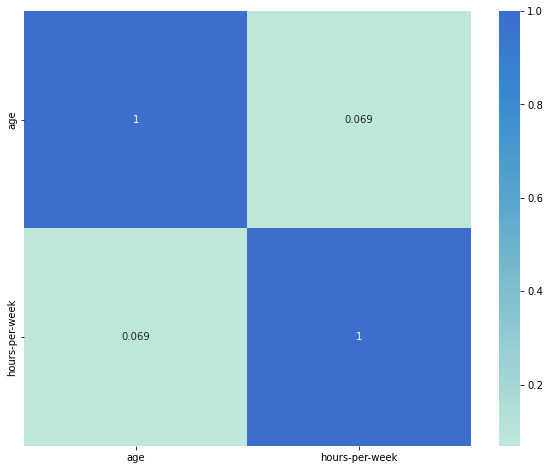

In [16]:
#to use seaborn to get heatmap
plt.figure(figsize=(10,8)) #to set size of plot
sns.heatmap(data=cor_contValues, annot=True, center=2) # to plot correlation data into heatmap

In [17]:
df.columns

Index(['age', 'marital-status', 'occupation', 'race', 'sex', 'hours-per-week',
       'label'],
      dtype='object')

In [18]:
dummies = pd.get_dummies(df,columns=['marital-status', 'occupation', 'race', 'sex'],prefix='C')
dummies = dummies.drop(['C_Female'],axis=1)
print(dummies)
cor = dummies.corr()
cor

       age  hours-per-week  label  C_Divorced  C_Married  C_Separated  \
0       39              40  <=50K           0          0            0   
1       50              13  <=50K           0          1            0   
2       38              40  <=50K           1          0            0   
3       53              40  <=50K           0          1            0   
4       28              40  <=50K           0          1            0   
...    ...             ...    ...         ...        ...          ...   
32556   27              38  <=50K           0          1            0   
32557   40              40   >50K           0          1            0   
32558   58              40  <=50K           0          0            0   
32559   22              20  <=50K           0          0            0   
32560   52              40   >50K           0          1            0   

       C_Single  C_Widowed  C_Adm-clerical  C_Armed-Forces  ...  \
0             1          0               1              

,age,hours-per-week,C_Divorced,C_Married,C_Separated,C_Single,C_Widowed,C_Adm-clerical,C_Armed-Forces,C_Craft-repair,...,C_Exec-managerial,C_Farming-fishing,C_Machine-op-inspct,C_Service-occupation,C_Tech-support,C_Transport-moving,C_Black,C_Other,C_White,C_Male
age,1.000000,0.068756,0.129975,0.318239,0.010210,-0.534359,0.265177,-0.042902,-0.010190,0.012515,...,0.099352,0.034210,-0.016257,-0.015880,-0.019576,0.026909,-0.019434,-0.027887,0.033412,0.088832
hours-per-week,0.068756,1.000000,0.026052,0.210912,-0.016587,-0.197936,-0.107122,-0.084378,0.000309,0.057375,...,0.139208,0.094170,0.006598,-0.125143,-0.013946,0.077596,-0.053153,-0.008075,0.049345,0.229309
C_Divorced,0.129975,0.026052,1.000000,-0.376955,-0.071665,-0.277772,-0.070501,0.085166,-0.006610,-0.025707,...,0.013312,-0.037254,0.001424,-0.019374,0.007190,-0.015292,0.017840,-0.024759,0.000371,-0.228621
C_Married,0.318239,0.210912,-0.376955,1.000000,-0.170963,-0.662654,-0.168188,-0.141300,-0.004667,0.125756,...,0.102492,0.046252,0.017692,-0.094791,-0.010864,0.073440,-0.120958,0.007491,0.096347,0.421465
C_Separated,0.010210,-0.016587,-0.071665,-0.170963,1.000000,-0.125980,-0.031975,0.015569,-0.002998,-0.013804,...,-0.018088,-0.013588,0.015360,0.015642,-0.001282,-0.010810,0.099531,-0.006492,-0.079078,-0.109135
C_Single,-0.534359,-0.197936,-0.277772,-0.662654,-0.125980,1.000000,-0.123935,0.072388,0.011990,-0.093239,...,-0.105865,-0.014115,-0.023374,0.090685,0.010429,-0.055718,0.071303,0.014485,-0.068446,-0.171434
C_Widowed,0.265177,-0.107122,-0.070501,-0.168188,-0.031975,-0.123935,1.000000,0.026810,-0.002949,-0.045231,...,-0.016749,-0.007593,-0.005989,0.050422,-0.009983,-0.019603,0.019848,-0.005284,-0.013310,-0.188487
C_Adm-clerical,-0.042902,-0.084378,0.085166,-0.141300,0.015569,0.072388,0.026810,1.000000,-0.006017,-0.137325,...,-0.136692,-0.064212,-0.092620,-0.308910,-0.061979,-0.082180,0.041812,0.003670,-0.037164,-0.263148
C_Armed-Forces,-0.010190,0.000309,-0.006610,-0.004667,-0.002998,0.011990,-0.002949,-0.006017,1.000000,-0.006310,...,-0.006281,-0.002951,-0.004256,-0.014195,-0.002848,-0.003776,0.000856,0.004689,-0.003605,0.011690
C_Craft-repair,0.012515,0.057375,-0.025707,0.125756,-0.013804,-0.093239,-0.045231,-0.137325,-0.006310,1.000000,...,-0.143353,-0.067342,-0.097133,-0.323963,-0.065000,-0.086185,-0.046924,-0.018330,0.050468,0.223128


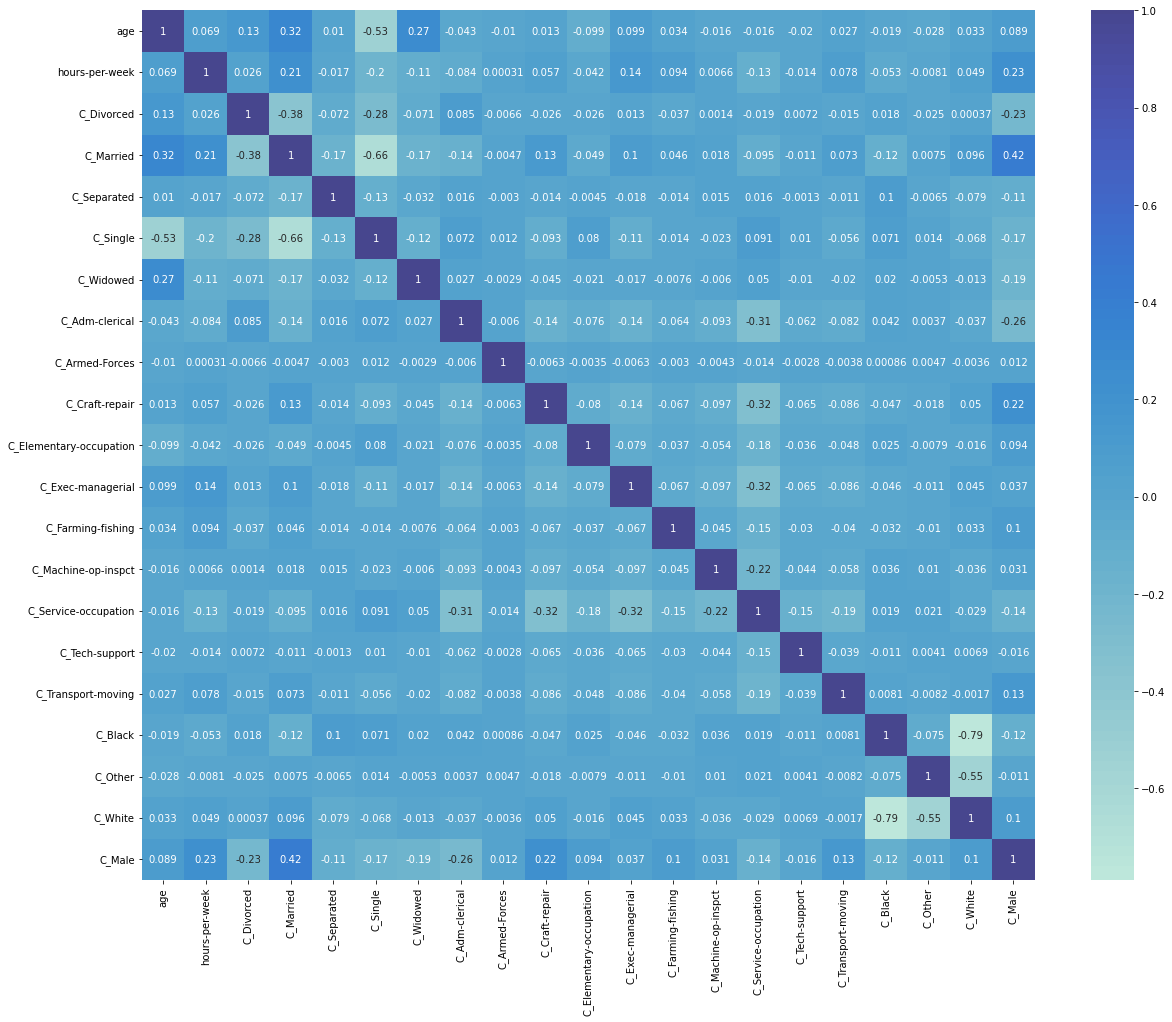

In [19]:
plt.figure(figsize=(20,16)) #to set size of plot
sns.heatmap(data=cor, annot=True, center=2) # to plot correlation data into heatmap
plt.savefig('correlation_all_columns.png')

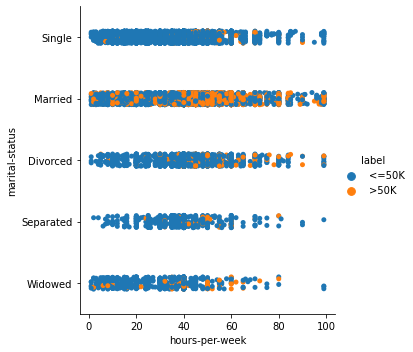

In [20]:
sns.catplot(data=df, x='hours-per-week',y='marital-status',hue=('label'), aspect=1)
plt.savefig('catplot_hrs_marital.png')

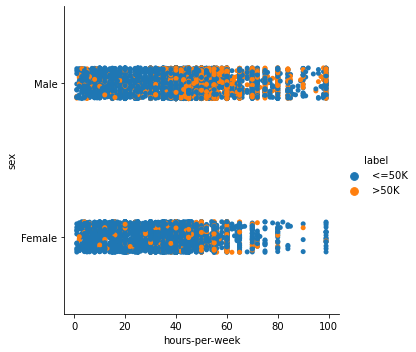

In [21]:
sns.catplot(data=df, x='hours-per-week',y='sex',hue=('label'), aspect=1)
plt.savefig('catplot_hrs_sex.png')

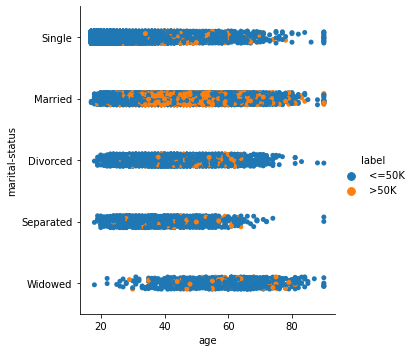

In [22]:
sns.catplot(data=df, x='age',y='marital-status',hue=('label'), aspect=1)
plt.savefig('catplot_age_marital.png')

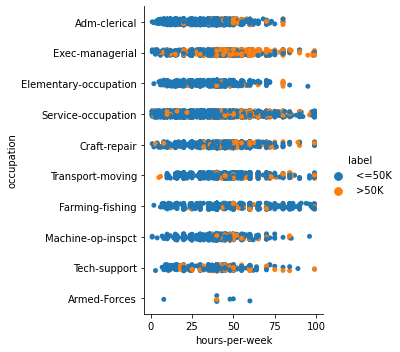

In [23]:
sns.catplot(data=df, x='hours-per-week',y='occupation',hue=('label'), aspect=1)
plt.savefig('catplot_hrs_occupation.png')

In [24]:
print(df.columns)
print(df.info())

Index(['age', 'marital-status', 'occupation', 'race', 'sex', 'hours-per-week',
       'label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   marital-status  32561 non-null  object
 2   occupation      32561 non-null  object
 3   race            32561 non-null  object
 4   sex             32561 non-null  object
 5   hours-per-week  32561 non-null  int64 
 6   label           32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB
None


# Create Train-Test-Split function

In [25]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    #randomly sample input df
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df
    

## Determine type of features

In [26]:
def determine_type_of_feature (df):
    
    feature_types =[] # to store categorisation of columns by appending categorical or continous value that corresponds to the column
    n_unique_values_threshold = 15 #threshold value is determine by previewing result of total unique values in each column
    
    for column in df.columns:
        unique_values = df[column].unique()
        example_value = unique_values[0] #get first value
        
        if (isinstance(example_value,str) or (len(unique_values)<= n_unique_values_threshold)):
            feature_types.append('categorical')
        else:
            feature_types.append('continuous')
        
    return feature_types

## Check Data purity

In [27]:
def check_purity(data):
    label_column = data[:,-1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) ==1:
        return True
    else:
        return False

## Classify function

In [28]:
def classify_data (data):
    label_column = data[:,-1]
    # get most common class if the data is not pure

    unique_classes, counts_unique_classes = np.unique(label_column,return_counts=True)
    commonClass_index = counts_unique_classes.argmax()
    classification = unique_classes[commonClass_index]
    return classification

## Potential splits function

In [29]:
def get_potential_splits(data):
    potential_splits = {}
    data = train_df.values
    _,n_columns = data.shape #get number of columns

    for column_index in range(n_columns - 1): #loop through all columns except last one
        values = data[:,column_index]
        unique_values = np.unique(values)

        type_of_feature = FEATURE_TYPES[column_index]

        potential_splits[column_index] = unique_values

    return potential_splits

## Split data

In [30]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:,split_column]
    
    type_of_feature = FEATURE_TYPES[split_column]
    
    if type_of_feature == 'continuous':
        #boolean indexing. Returns result of True and False
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values > split_value]
    else:
        #boolean indexing. Returns result of True and False for categorical data
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]

    return data_below, data_above

## Get lowest overall Entropy

In [31]:
def calculate_entropy(data):
    #find probablity of each class
    label_column = data[:,-1]
    _,counts = np.unique(label_column, return_counts=True)

    probabilties = counts/counts.sum()
    entropy = sum(probabilties * -np.log2(probabilties))
    return entropy

In [32]:
def calculate_overall_entropy(data_below, data_above):
    
    n_data_points = len(data_below) + len(data_above)
    p_data_below = len(data_below)/n_data_points
    p_data_above = len(data_above)/n_data_points

    overall_entropy = (p_data_below * calculate_entropy(data_below) + p_data_above* calculate_entropy(data_above))
    return overall_entropy

In [33]:
def determine_best_split(data, potential_splits):
    overall_entropy = 999 #initialise to be a very large value
    for column_index in potential_splits:
        #print(COLUMN_HEADERS[column_index],"-", len(np.unique(data[:,column_index])))
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data,split_column = column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy (data_below, data_above)

            if current_overall_entropy < overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    return best_split_column, best_split_value

## Decision Tree Algorithm

In [34]:
#sub_tree = {question:[yes_answer,no_answer]}

def decision_tree_algorithm(df,counter=0, min_samples=2, max_depth=5):
    #min_samples is used to prune the tree
    #max_depth controls the number of layers of the tree
    #data prepration to ensure all data used are numpy 2D array which all other helper functions uses as input
    if counter ==0:
        global COLUMN_HEADERS, FEATURE_TYPES #set columns headers as a global parameter so that it can be used in any function
        COLUMN_HEADERS = df.columns #only get column headers during first call
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df
        
    #base case to ensure algorithm will not keep calling itself
    if (check_purity(data) or (len(data)<min_samples) or (counter== max_depth)):
        classification = classify_data(data)
        return classification
    
    #data is not pure. Recursive portion.
    else:
        counter += 1
        
        #helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data,potential_splits)
        data_below, data_above = split_data(data,split_column, split_value)
        
        if len(data_below)==0 or len(data_above)==0:
            classification = classify_data(data)
            return classification
        
        #create sub-tree. Instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        
        type_of_feature = FEATURE_TYPES[split_column]
    
        if type_of_feature == 'continuous':
            question = "{} <= {}".format(feature_name, split_value) #uses string format to pass in variables
        else:
            question = "{} == {}".format(feature_name, split_value) #uses string format to pass in variables
        sub_tree = {question:[]} #append yes and no answer to subtree
        
        #find answers (recursive portion)
        yes_answer = decision_tree_algorithm(data_below,counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above,counter, min_samples, max_depth)
        
        if yes_answer == no_answer: 
            #to double check and ensure yes and no answer don't give the same result. Otherwise the subtree will not make sense
            sub_tree = yes_answer
        else:
        
            sub_tree [question].append(yes_answer)
            sub_tree [question].append(no_answer)
        
        return sub_tree
        
        
    

## Classification

In [35]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    #ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    #base case

    if not isinstance(answer,dict):
        return answer
    #recursive portion
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

## Calculate Accuracy

In [36]:
def calculate_accuracy(df, tree):
    
    possible_outcome = np.unique(df['label'])
    df['positive_outcome'] = possible_outcome[len(possible_outcome)-1]
    df['negative_outcome'] = possible_outcome[len(possible_outcome)-2]
    
    #create 2 new columns. 1st one to contain our classification result. 2nd column to check if the result matches actual result.
    df['classification'] = df.apply(classify_example, axis=1, args=(tree,)) # args need to pass in tuple. (tree,) is a tuple with 1 element
    df['classification_correct'] = (df.classification== df.label)
    df['classification_TP'] = np.where((df.classification== df.label) & (df.positive_outcome==df.label),True,False)
    df['classification_TN'] = np.where((df.classification== df.label) & (df.negative_outcome==df.label),True,False)
    df['classification_FP'] = np.where((df.classification!= df.label) & (df.positive_outcome==df.label),True,False)
    df['classification_FN'] = np.where((df.classification!= df.label) & (df.negative_outcome==df.label),True,False)
    
    accuracy = df.classification_correct.mean()
    num_TP = df.classification_TP.sum()
    num_TN = df.classification_TN.sum()
    num_FP = df.classification_FP.sum()
    num_FN = df.classification_FN.sum()
    print('TP:',num_TP,',TN:',num_TN,',FP:',num_FP,',FN:',num_FN)
    
    precision = num_TP/(num_TP+num_FP)
    recall = num_TP/(num_TP+num_FN)
    fmeasure = (2*num_TP)/(2*num_TP+num_FN+num_FP)
    
    confusion_matrix = [num_TP,num_FP,num_TN,num_FN]
    
    return accuracy, precision, recall, fmeasure, confusion_matrix

In [37]:
train_df, test_df = train_test_split(df,test_size = 0.2)

In [38]:
random.seed(0)

In [39]:
from timeit import default_timer as timer
start_time = timer()
print('start_time:',start_time)
tree = decision_tree_algorithm(train_df, min_samples=5, max_depth=10)
end_time = timer()
print('end_time:',end_time)
time_taken = end_time-start_time
print('time_taken:',time_taken)

start_time: 145.8377556
end_time: 201.7617274
time_taken: 55.923971800000004


In [40]:
start_time = timer()
print('start_time:',start_time)

#accuracy, num_TP, num_TN, num_FP, num_FN = calculate_accuracy(test_df,tree)
accuracy, precision, recall, fmeasure, confusion_matrix = calculate_accuracy(test_df,tree)
print('accuracy:',accuracy,',precision:',precision,',recall:',recall,',fmeasure:',fmeasure)
print('confusion matrix:',confusion_matrix)

cost_matrix=[-1,1,0,1]
print('cost matrix:',cost_matrix)
i=0
cost=[]
for c in confusion_matrix:
    cal_cost = confusion_matrix[i]*cost_matrix[i]
    cost.append(cal_cost)
    i+=1
print('calculated cost:',cost)
total_cost = 0
for wc in cost:
    total_cost = wc+total_cost
print('total_cost:',total_cost)

end_time = timer()
print('end_time:',end_time)
time_taken = end_time-start_time
print('time_taken:',time_taken)

start_time: 201.7797767
TP: 775 ,TN: 4471 ,FP: 787 ,FN: 479
accuracy: 0.8055896805896806 ,precision: 0.49615877080665816 ,recall: 0.6180223285486444 ,fmeasure: 0.5504261363636364
confusion matrix: [775, 787, 4471, 479]
cost matrix: [-1, 1, 0, 1]
calculated cost: [-775, 787, 0, 479]
total_cost: 491
end_time: 202.0151954
time_taken: 0.23541869999999676


In [41]:
pprint(tree, width=40)

{'marital-status == Married': [{'occupation == Exec-managerial': [{'age <= 27': [{'age <= 23': ['<=50K',
                                                                                                {'race == Black': [{'hours-per-week <= 45': ['>50K',
                                                                                                                                             '<=50K']},
                                                                                                                   {'hours-per-week <= 30': ['<=50K',
                                                                                                                                             {'hours-per-week <= 52': [{'hours-per-week <= 45': [{'hours-per-week <= 43': ['<=50K',
                                                                                                                                                                                                                        

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6512 entries, 13805 to 9750
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     6512 non-null   int64 
 1   marital-status          6512 non-null   object
 2   occupation              6512 non-null   object
 3   race                    6512 non-null   object
 4   sex                     6512 non-null   object
 5   hours-per-week          6512 non-null   int64 
 6   label                   6512 non-null   object
 7   positive_outcome        6512 non-null   object
 8   negative_outcome        6512 non-null   object
 9   classification          6512 non-null   object
 10  classification_correct  6512 non-null   bool  
 11  classification_TP       6512 non-null   bool  
 12  classification_TN       6512 non-null   bool  
 13  classification_FP       6512 non-null   bool  
 14  classification_FN       6512 non-null   bool  
dtype